# World Bank Data and Solow Model with Exogenous Growth
### Assignment 14/04/21

Author: Junghanss Juan Cruz

### 1. Para los paises de USA, England, Argentina, South Korea, China, Mexico, Costa Rica, France, Rep of Congo, India and Kenia, calcular y graficar en python las siguientes variables para el periodo de 1978 a 2019:

- Tasa de crecimiento del producto per capita en USD constantes

- Tasa de crecimiento de la población total

- Tasa de crecimiento del Gross Capital Formation

- Gross Savings (current USD)


In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import wb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.precision',2) 
#pd.options.display.float_format = '{:,.2f}'.format # ajustamos el formato del tipo float

countries = ['US', 'GB', 'ARG', 'KOR', 'CHN', 'MEX', 'CRI', 'FRA', 'COG', 'IND', 'KEN'] 
countries_2 = {'United States': 'USA',
              'United Kingdom':'UK',
              'Argentina':'ARGY',
              'Korea, Rep.':'KOR',
             'China':'CHN',
             'Mexico':'MES',
              'Costa Rica':'CR',
              'France':'FR',
              'Congo, Rep.':'CON',
              'India':'IND',
              'Kenya':'KEN',
              }
# USA, England, Argentina, South Korea, China, Mexico, Costa Rica, France, Rep of Congo, India and Kenia

Variables from World Bank are:
- SP.POP.TOTL: Total population in midyear estimates.
- NY.GDP.MKTP.KD: GDP at purchaser's prices in constant 2010 U.S.
- NE.GDI.TOTL.KD: Gross capital formation (formerly gross domestic investment).
- NY.GNS.ICTR.CD: Gross savings calculated as gross national income less total consumption, plus net transfers (in current U.S. dollars).

Refer to https://pandas-datareader.readthedocs.io/en/latest/readers/world-bank.html for usage information and https://data.worldbank.org/indicator/ for more information about each WB indicator.

In [3]:
indicators = ['SP.POP.TOTL', 'NY.GDP.MKTP.KD', 'NE.GDI.TOTL.KD', 'NY.GNS.ICTR.CD']

# Population, GDP (USD 2010 Constant), Gross Capital Formation (USD 2010 Constant), Gross Savings (Current USD)

In [4]:
data = wb.download(indicator=indicators,
                  country=countries,start=1978, end=2019)
print("Downloaded Raw Data: ")
data.head(10)

Downloaded Raw Data: 


SP.POP.TOTL  NY.GDP.MKTP.KD  NE.GDI.TOTL.KD  NY.GNS.ICTR.CD
country   year                                                             
Argentina 2019     44938712        4.38e+11        6.48e+10        7.04e+10
          2018     44494502        4.47e+11        7.82e+10        7.47e+10
          2017     44044811        4.59e+11        8.70e+10        8.42e+10
          2016     43590368        4.46e+11        7.53e+10        8.16e+10
          2015     43131966        4.56e+11        7.94e+10        8.41e+10
          2014     42669500        4.44e+11        7.59e+10        8.29e+10
          2013     42202935        4.55e+11        8.09e+10        8.26e+10
          2012     41733271        4.44e+11        7.73e+10        8.77e+10
          2011     41261490        4.49e+11        8.71e+10        9.20e+10
          2010     40788453        4.24e+11        7.50e+10        7.33e+10

In [5]:
print("Each downloaded variable format is: \n ", data.dtypes)
# print("\n",data.index.head) # We can observe that our dataframe index is multi-index type 

Each downloaded variable format is: 
  SP.POP.TOTL         int64
NY.GDP.MKTP.KD    float64
NE.GDI.TOTL.KD    float64
NY.GNS.ICTR.CD    float64
dtype: object


In [6]:
data.unstack('country')
data.sort_index(ascending=True, inplace=True) # Sort by year, ascending

In [7]:
"""Variable Nº1 - Tasa de crecimiento del producto per capita en USD constantes | GDP Per Capita Growth Rate"""

GDP = data.unstack('country')['NY.GDP.MKTP.KD'] # Our constant (USD Price 2010) GDP variable
#GDP.rename(columns=lambda x: x[0:3], inplace=True) # Podemos renombar columnas con función que recorte todo menos iniciales
GDP.rename(countries_2, axis='columns', inplace=True) # Rename our datafrome as from our dictionary
GDP.index = pd.period_range(start=GDP.index[0], periods=len(GDP.index), freq='A') # Index taken as period type now
print("Index type is: ", GDP.index.dtype) # Not to be confused with timestamp or datetime type

GDP_Growth = GDP.pct_change() * 100
GDP_Growth.head(5)

Index type is:  period[A-DEC]


country,ARGY,CHN,CON,CR,FR,IND,KEN,KOR,MES,UK,USA
1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979,10.22,7.59,9.81,4.94,3.55,-5.24,7.62,8.67,9.70,3.75,3.17
1980,1.52,7.83,17.64,0.75,1.58,6.74,5.59,-1.65,9.23,-2.03,-0.26
1981,-5.19,5.11,17.62,-2.26,1.07,6.01,3.77,7.25,8.53,-0.79,2.54
1982,-0.74,9.02,23.60,-7.29,2.51,3.48,1.51,8.34,-0.52,1.99,-1.80


In [8]:
"""Variable Nº2 - Total Population Growth Rate"""
Population = data.unstack('country')['SP.POP.TOTL']
Population_Growth = Population.pct_change()*100
Population_Growth.rename(countries_2, axis='columns', inplace=True)
Population_Growth.head(5)

country,ARGY,CHN,CON,CR,FR,IND,KEN,KOR,MES,UK,USA
year,,,,,,,,,,,
1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979,1.52,1.34,2.95,2.72,0.41,2.32,3.90,1.53,2.53,0.09,1.11
1980,1.55,1.26,2.96,2.73,0.45,2.34,3.92,1.57,2.48,0.12,0.96
1981,1.58,1.29,2.96,2.75,0.49,2.35,3.94,1.57,2.43,0.03,0.99
1982,1.61,1.48,2.96,2.76,0.52,2.36,3.94,1.56,2.38,-0.04,0.96


In [9]:
"""Variable Nº3 - Gross Capital Formation Growth Rate"""
GCF = data.unstack('country')['NE.GDI.TOTL.KD']
GCF_Growth = GCF.pct_change()*100
GCF_Growth.rename(countries_2, axis='columns', inplace=True)
GCF_Growth.head(5)

country,ARGY,CHN,CON,CR,FR,IND,KEN,KOR,MES,UK,USA
year,,,,,,,,,,,
1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979,10.21,NaN,7.30,9.25,5.56,-11.63,-24.49,16.91,15.62,3.25,3.85
1980,8.11,NaN,49.11,7.00,3.05,8.56,13.65,-15.74,12.75,-15.16,-7.70
1981,-14.98,NaN,80.95,-37.73,-7.59,-5.48,-4.72,2.37,15.21,-8.96,6.77
1982,-19.94,NaN,36.84,-25.45,3.42,3.01,-22.72,9.64,-24.46,10.47,-10.18


In [10]:
"""Variable Nº4 - Gross Savings (current USD)"""
GSavings = data.unstack('country')['NY.GNS.ICTR.CD']
GSavings.rename(countries_2, axis='columns', inplace=True)
GSavings.head(5)

country,ARGY,CHN,CON,CR,FR,IND,KEN,KOR,MES,UK,USA
year,,,,,,,,,,,
1978,1.75e+10,NaN,7.14e+07,4.53e+08,1.27e+11,2.07e+10,9.65e+08,1.64e+10,NaN,7.22e+10,5.51e+11
1979,1.75e+10,NaN,2.15e+08,4.70e+08,1.54e+11,2.41e+10,8.88e+08,2.05e+10,2.94e+10,9.05e+10,6.18e+11
1980,1.77e+10,NaN,4.46e+08,5.83e+08,1.71e+11,2.71e+10,1.26e+09,1.64e+10,5.36e+10,1.07e+11,6.34e+11
1981,1.56e+10,NaN,4.99e+08,3.76e+08,1.35e+11,3.06e+10,1.35e+09,1.79e+10,6.69e+10,9.61e+10,7.49e+11
1982,1.55e+10,6.93e+10,8.48e+08,3.52e+08,1.22e+11,3.17e+10,1.04e+09,2.07e+10,4.82e+10,9.07e+10,7.28e+11


## Graphs

Now we can proceed to plot each variable as follows:

- GDP Growth Rate: it will be presented in subplots divided by country groups likeas Developed Markets, Emerging Markets LATAM and Asia. 


- Population Growth Rate: one single plot with a 10 options color map.  


- Gross Capital Formation Rate: three subplots divided by country groups.


- Gross Savings: three combined plots to contrast countries easly.

### Usage special references:
- %matplotlib inline will lead to static images of our plot embedded in the notebook
- plt.rc() allows to control graphs parameters (fontsize, labelsize, titlesize) in a general way
- pd.plotting.register_matplotlib_converters() to register Pandas Formatters and Converters with matplotlib
- plt.style.use('seaborn'). Refer to more styles if you want to change it (https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

In [11]:
%matplotlib inline
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=16)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=16)   # fontsize of the figure title

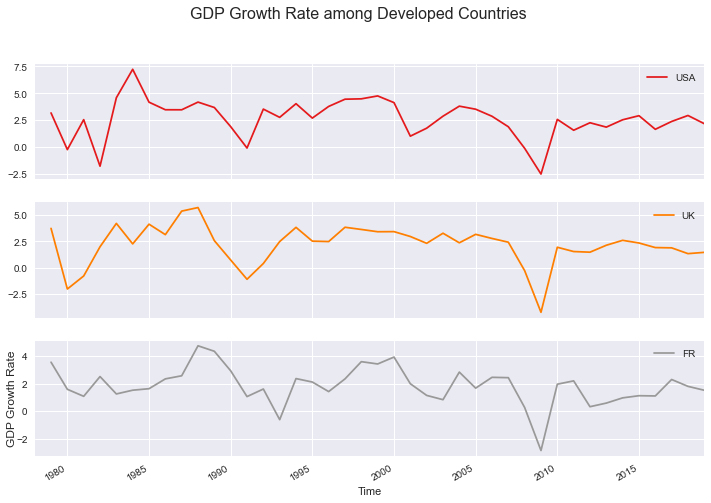

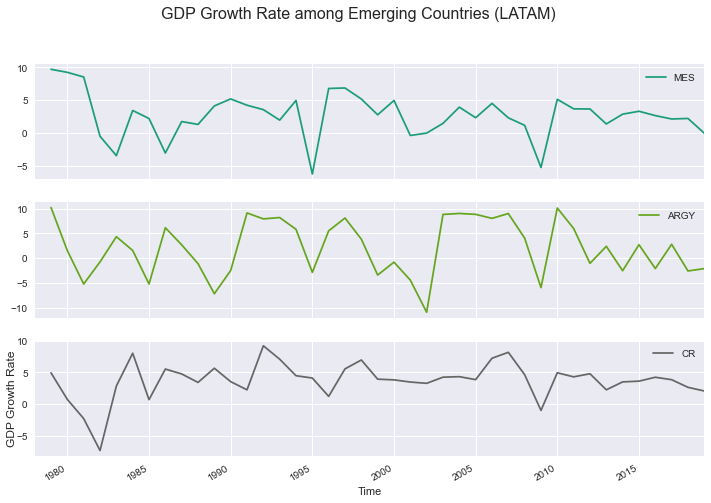

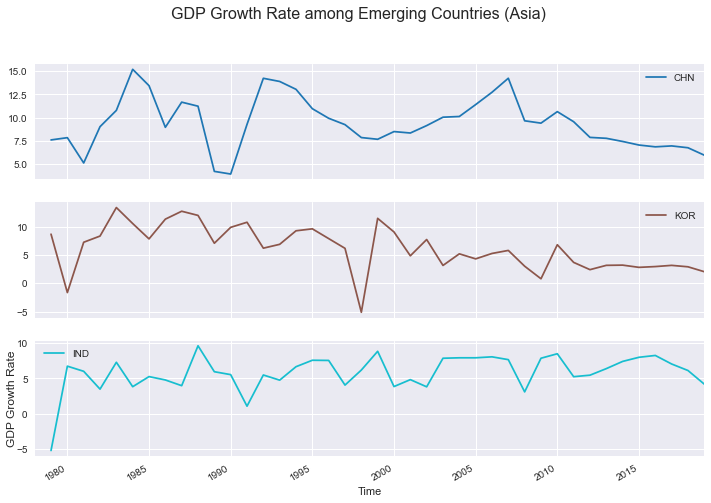

In [12]:
pd.plotting.register_matplotlib_converters()
plt.style.use('seaborn') 

GDP_Growth[['USA','UK','FR']]['1978':].plot(subplots=True, figsize=(12,8), cmap='Set1')
plt.suptitle('GDP Growth Rate among Developed Countries')
plt.xlabel('Time')
plt.ylabel('GDP Growth Rate', fontsize=(12),rotation=90, verticalalignment='center')

GDP_Growth[['MES','ARGY','CR']]['1978':].plot(subplots=True, figsize=(12,8), cmap='Dark2')
plt.suptitle('GDP Growth Rate among Emerging Countries (LATAM)')
plt.xlabel('Time')
plt.ylabel('GDP Growth Rate', fontsize=(12),rotation=90, verticalalignment='center')

GDP_Growth[['CHN','KOR','IND']]['1978':].plot(subplots=True, figsize=(12,8), cmap='tab10')
plt.suptitle('GDP Growth Rate among Emerging Countries (Asia)')
plt.xlabel('Time')
plt.ylabel('GDP Growth Rate', fontsize=(12),rotation=90, verticalalignment='center')

# Kenya and Congo have been set aside for this plots in order to have three equal sized groups
plt.legend()
plt.show()

## GDP Appendix: Hodrick Prescott Filter

Although we've just plotted the GDP Growth Rate among countries group, just for fun we could plot the log(GDP) and remove the cyclical component of a time series from our World Bank (WB) raw data. Therefore, Hodrick Prescott Filter would be a good choice for that. It is used to obtain a smoothed-curve representation of a time series.

The reasoning for the methodology uses ideas related to the decomposition of time series. 


Let $y_{t}$ for $t=1,2,...,T\,$ denote the logarithms of a time series variable. The series $y_{t}$, is made up of a trend component $\tau _{t}$, a cyclical component $c_{t}$, and an error component $\epsilon _{t}$ such that $y_{t}\ =\tau _{t}\ +c_{t}\ +\epsilon _{t}\,$. Given an adequately chosen, positive value of $\lambda$ , there is a trend component that will solve.

$\min _{{\tau }}\left(\sum _{{t=1}}^{T}{(y_{t}-\tau _{t})^{2}}+\lambda \sum _{{t=2}}^{{T-1}}{[(\tau _{{t+1}}-\tau _{t})-(\tau _{t}-\tau _{{t-1}})]^{2}}\right).\,$
The first term of the equation is the sum of the squared deviations $d_{t}=y_{t}-\tau _{t}$

To work with HP Filter we'll need Statsmodels package (refer to "pip install statsmodels" or "conda install -c conda-forge statsmodels" if you don't have it yet). More info at: https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html



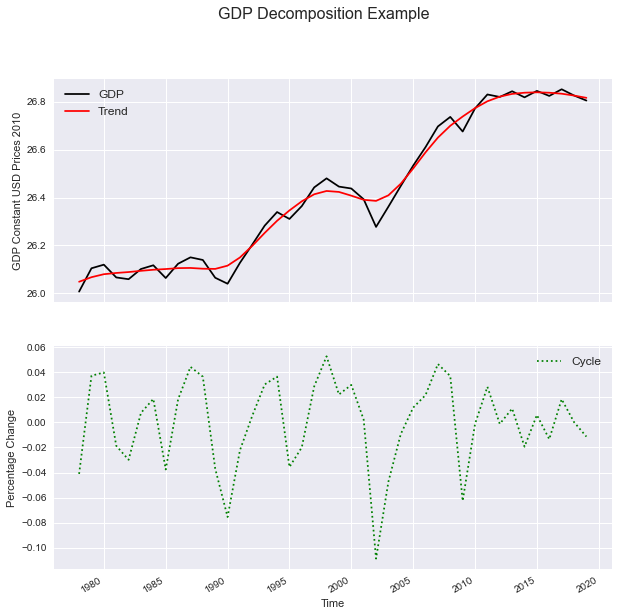

In [13]:
import statsmodels.api as sm
import numpy as np

"""HP Filter example for the log(GDP) of Argentina"""

GDP_decomp_example = np.log(data.loc['Argentina','NY.GDP.MKTP.KD'])   # See that we work with log(GDP) this time
GDP_decomp_example.index = pd.to_datetime(GDP_decomp_example.index, format='%Y') # we use datetime format in this example instead of period

cycle, trend = sm.tsa.filters.hpfilter(GDP_decomp_example, lamb=6.25)

fig, ax = plt.subplots(2,figsize=(10,10))
ax[0].plot(GDP_decomp_example, "k", ls = '-', label="GDP")
ax[0].plot(trend, "r", ls = '-', label="Trend")
ax[0].set(xlabel="Time", ylabel="GDP Constant USD Prices 2010")
ax[0].legend(fontsize=12)
ax[1].set(xlabel="Time", ylabel="Percentage Change")
ax[1].plot(cycle, 'g', ls=':', label="Cycle")
plt.suptitle('GDP Decomposition Example')
fig.autofmt_xdate()    # Para ajustar automáticamente el label fecha en eje X
ax[1].legend(fontsize=12)
plt.show()

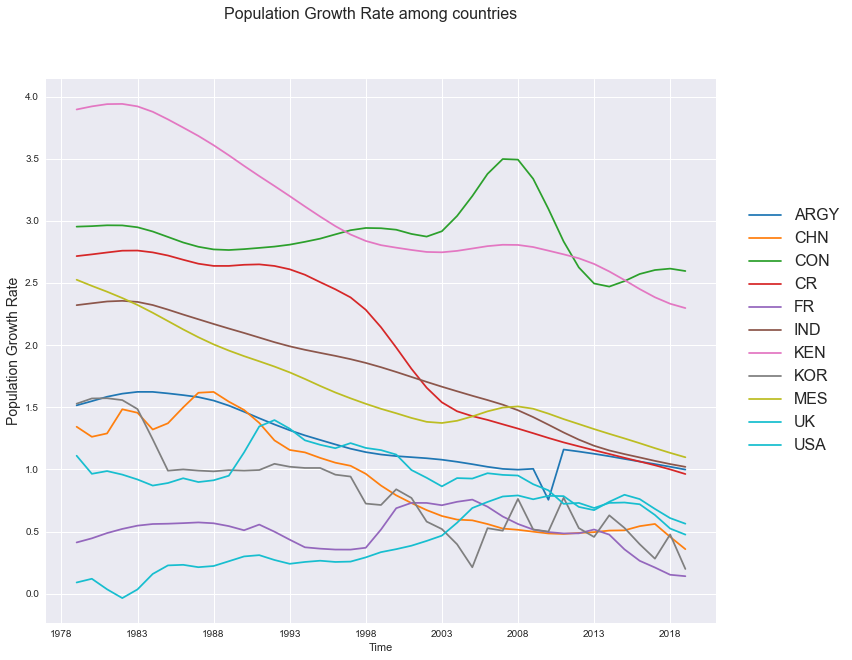

In [14]:
Population_Growth['1978':].plot(subplots=False, figsize=(12,10), colormap='tab10')
plt.suptitle('Population Growth Rate among countries')
plt.xlabel('Time')
plt.ylabel('Population Growth Rate', fontsize=14)

plt.legend(loc=(1.04,0.3), fontsize=(16))    # These special coordinates locate our labels out of the plot box
plt.show()

# El grafico con los 11 países juntos no resulta ser muy atractivo ni facilmente legible, pero a fines del ejercicio es práctico

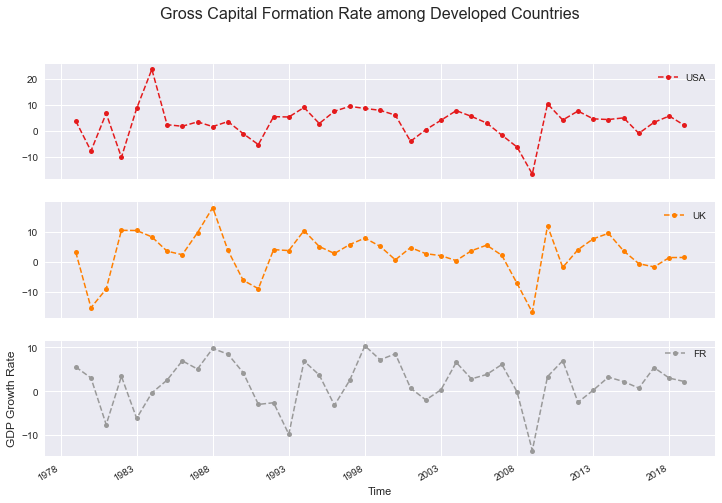

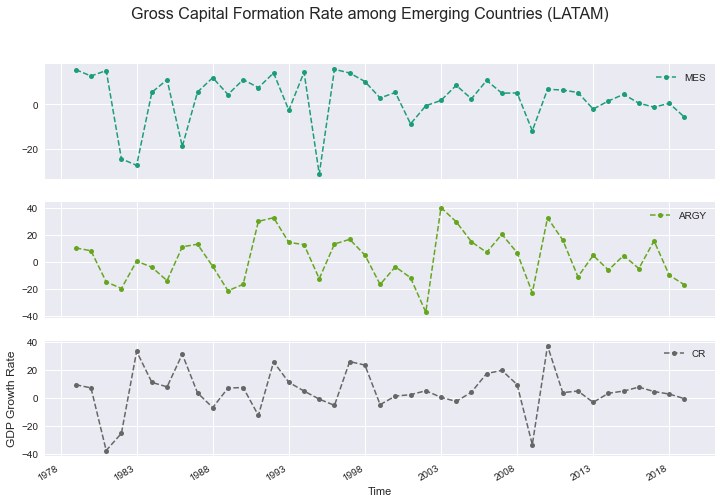

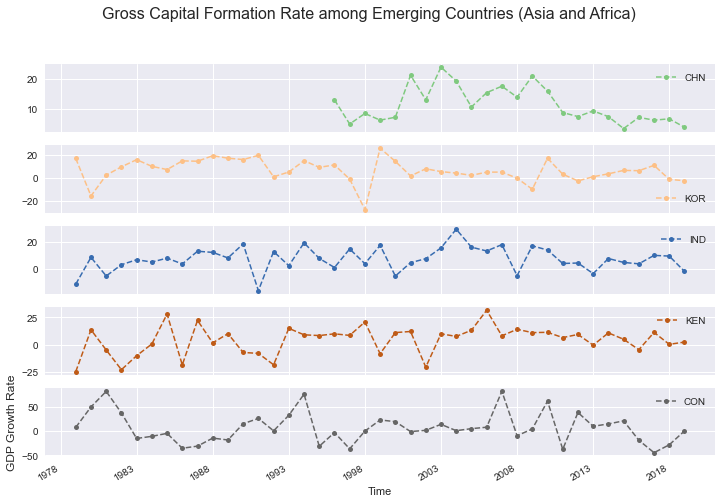

In [15]:
GCF_Growth[['USA','UK','FR']]['1978':].plot(subplots=True, figsize=(12,8), cmap="Set1", marker='o', linestyle='dashed', linewidth=1.5, markersize=5)
plt.suptitle('Gross Capital Formation Rate among Developed Countries', fontsize=16)
plt.xlabel('Time')
plt.ylabel('GDP Growth Rate', fontsize=12)

GCF_Growth[['MES','ARGY','CR']]['1978':].plot(subplots=True, figsize=(12,8), cmap='Dark2', marker='o', linestyle='dashed', linewidth=1.5, markersize=5)
plt.suptitle('Gross Capital Formation Rate among Emerging Countries (LATAM)', fontsize=16)
plt.xlabel('Time')
plt.ylabel('GDP Growth Rate', fontsize=12)

GCF_Growth[['CHN','KOR','IND','KEN','CON']]['1978':].plot(subplots=True, figsize=(12,8), cmap='Accent', marker='o', linestyle='dashed', linewidth=1.5, markersize=5)
plt.suptitle('Gross Capital Formation Rate among Emerging Countries (Asia and Africa)', fontsize=16)
plt.xlabel('Time')
plt.ylabel('GDP Growth Rate', fontsize=12)

# We can observe that chinese data starts around 1996

plt.legend()
plt.show()

<ipython-input-16-b868915d1cfc>:15: RuntimeWarning: invalid value encountered in log
  np.log(GSavings[['CHN','KOR','IND','KEN','CON']]['1978':]).plot(subplots=False, figsize=(12,8), cmap='Accent', linestyle='solid', linewidth=1.5, markersize=5)


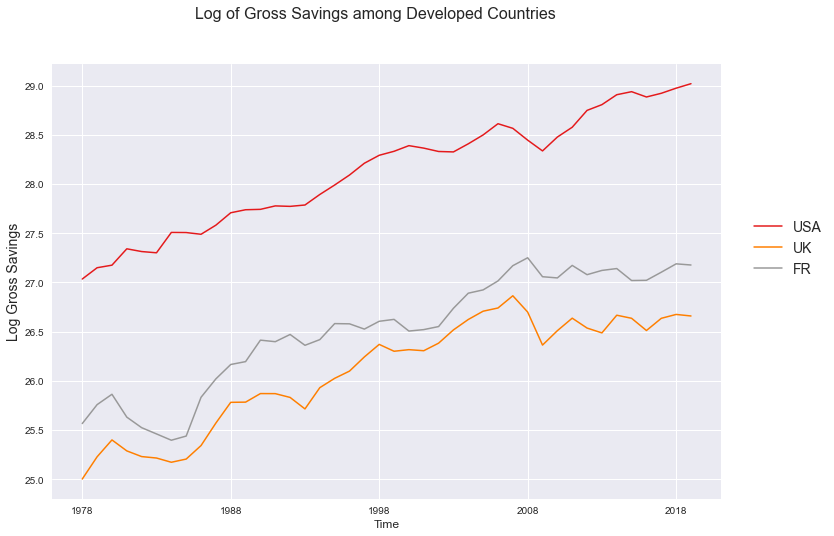

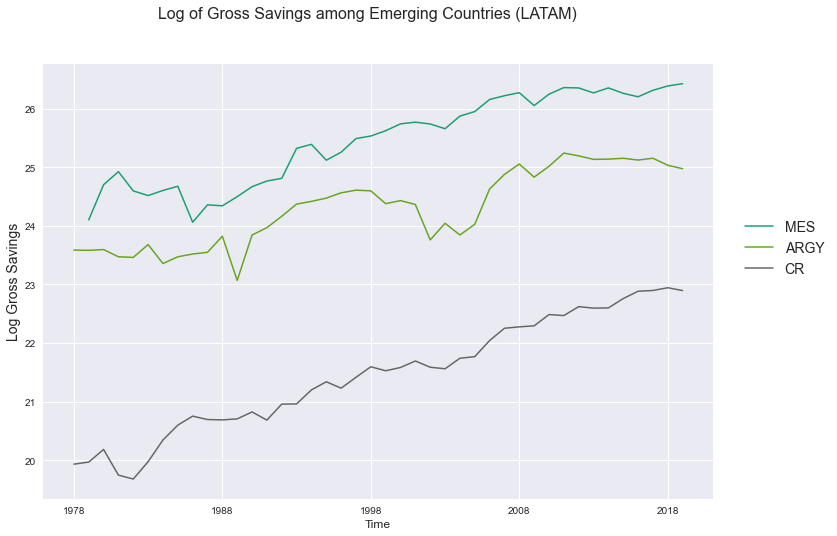

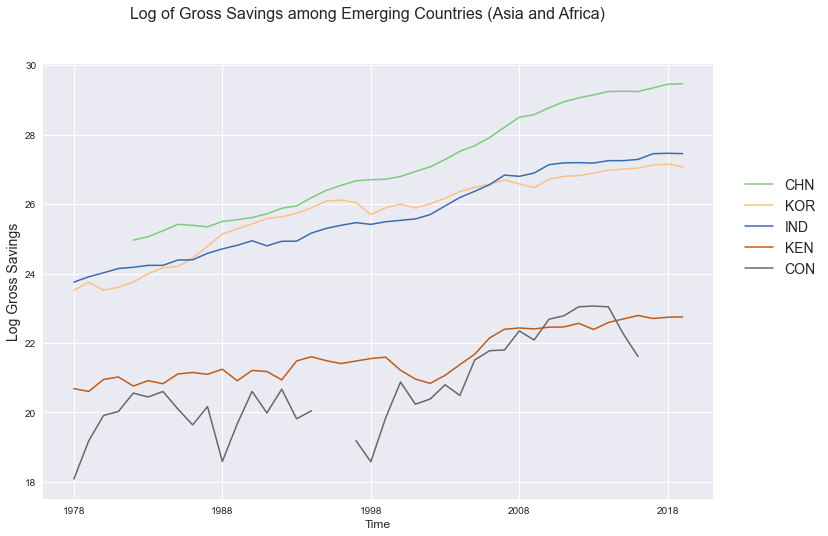

In [16]:
# We will take the logarithms of the variables for the sake of the Y axis 

np.log(GSavings[['USA','UK','FR']]['1978':]).plot(subplots=False, figsize=(12,8), cmap="Set1", linestyle='solid', linewidth=1.5, markersize=5)
plt.suptitle('Log of Gross Savings among Developed Countries')
plt.xlabel('Time', fontsize=(12))
plt.ylabel('Log Gross Savings', fontsize=(14))
plt.legend(loc=(1.04,0.5),fontsize=(14))

np.log(GSavings[['MES','ARGY','CR']]['1978':]).plot(subplots=False, figsize=(12,8), cmap='Dark2', linestyle='solid', linewidth=1.5, markersize=5)
plt.suptitle('Log of Gross Savings among Emerging Countries (LATAM)')
plt.xlabel('Time', fontsize=(12))
plt.ylabel('Log Gross Savings', fontsize=(14))
plt.legend(loc=(1.04,0.5),fontsize=(14))

np.log(GSavings[['CHN','KOR','IND','KEN','CON']]['1978':]).plot(subplots=False, figsize=(12,8), cmap='Accent', linestyle='solid', linewidth=1.5, markersize=5)
plt.suptitle('Log of Gross Savings among Emerging Countries (Asia and Africa)')
plt.xlabel('Time', fontsize=(12))
plt.ylabel('Log Gross Savings', fontsize=(14))
plt.legend(loc=(1.04,0.5),fontsize=(14))    

plt.show()

### 2.	Al finalizar, seleccionen tres paises para que calculen y grafiquen el SS del modelo de Solow con crecimiento exógeno con los siguientes parámetros:

- delta = 0.1 (puntos extra para el que calcule la verdadera tasa de depreciación para los paises que seleccionen, utilicen el promedio del periodo establecido) (Pista: recuerden las formulas del modelo para Kt+1 y que It = St)
- alpha = 0.5
- n = promedio del periodo establecido en el ejercicio
- s = 0.2 (puntos extra para el que calcule la verdadera savings rate para los paises que seleccionen, para el SS utilicen el promedio del periodo establecido) 
- A = 8
- k_inicial = 9


In [17]:
"""Solow Model Stationary State with Exogenous Growth"""

country_example = ('ARGY','CR','CHN')

# CHOOSE A VALUE FOR X TO SELECT A COUNTRY: 0 = Argentina ; 1 = Costa Rica ; 2 = China
country = 1

k_inicial = 9
K_size = 400                   
A = 8                                                     
alpha = 0.50                     
s = 0.20                         
delta = 0.10
n = np.mean(Population_Growth[[country_example[country]]]['1978':])/100
print("n value:", *n)

K = np.arange(K_size)            # Create empty array of K


n value: 0.01976009938234094


In [18]:
"""Functions"""

def output(K):   # Cobb-Douglas Production Function
    N=1
    Y = A * (K)**(alpha) * (N)**(1-alpha)    
    return Y

def SteadyStateValues(s, A, n, delta, alpha):
    N=1
    Kstar = round(((s*A*(N)**(1-alpha))/n+delta)**(1/(1-alpha)),3)
    Ystar = round(A  *(Kstar**alpha)*((N)**(1-alpha)),3)
    Istar = round(s*Ystar,3)
    Cstar = round(Ystar - Istar,3)
    Dstar = delta*Kstar
    return Kstar, Ystar, Istar, Cstar, Dstar

In [19]:
"""Steady State Values"""
Kstar, Ystar, Istar, Cstar, Dstar = SteadyStateValues(s, A, n, delta, alpha)
print("Steady State Capital for " + str(country_example[country]) + " is: ", *Kstar) # * to remove the DataFrame attributes that get printed
print("Steady State Output value for "+ str(country_example[country]) + " is: ", *Ystar)
print("Steady State Investment value for "+ str(country_example[country]) + " is: ", *Istar)
print("Steady State Consumption value for "+ str(country_example[country]) + " is: ", *Cstar)

Steady State Capital for CR is:  6572.548
Steady State Output value for CR is:  648.57
Steady State Investment value for CR is:  129.714
Steady State Consumption value for CR is:  518.856


In [20]:
"""Arrays"""

Y = output(K)
D = delta*K
I = s*Y
C = (1-s)*Y

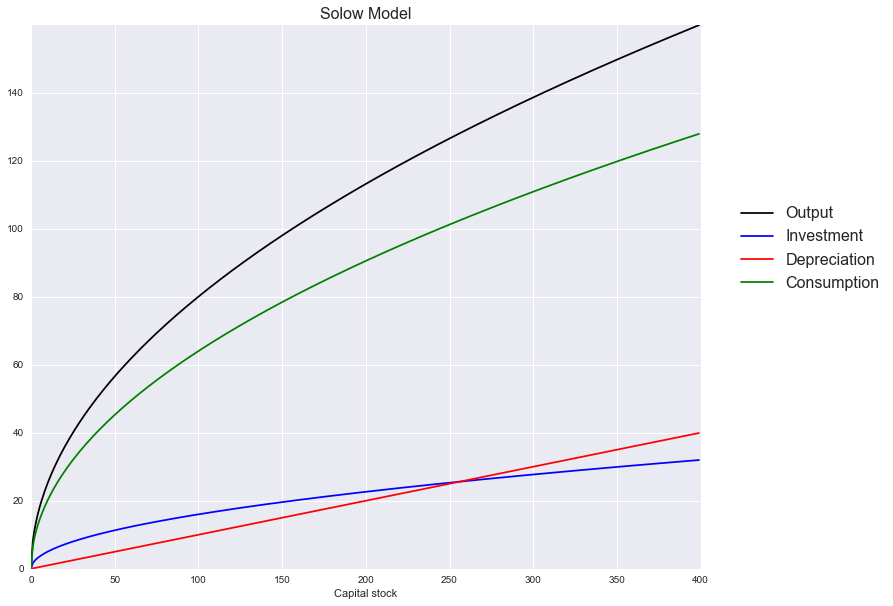

In [23]:
"""Graphs"""

y_max = np.max(Y)
v = [0, K_size, 0, y_max]

plt.rc('figure', titlesize=16) 


fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(K, Y, "k", ls = '-', label="Output")
ax.plot(K, I, "b", ls = '-', label="Investment")
ax.plot(K, D, "r", ls = '-', label="Depreciation")
ax.plot(K, C, "g", ls = '-', label="Consumption")
ax.set(title="Solow Model", xlabel="Capital stock")
plt.legend(loc=(1.05,0.5), fontsize=16)
# plt.axvline(Kstar, ls = ":", color = 'k')
# plt.axhline(Istar, ls = ":", color = 'k')
# plt.axhline(Ystar, ls = ":", color = 'k')
plt.axis(v)
plt.show()